# Smooth throughput in 2023

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : May 26th 2023
- update : May 26th 2023

** Kernel anaconda3_auxtel**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Config

In [3]:
!ls dataout

MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-2023-01-17-HD38666.csv
MLfit_bouguer_linearfit-2023-01-18-HD38666.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_30nm_out.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230510-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230511-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv


In [4]:
DATE = "2023-January"
FILTERTYPE = "empty~holo4_003"
SITE = "AUXTEL"
spectractormode = "psf2dffm"
ext = "rebin2"   # run BPS by removing ACQ
FLAG_POLAR = False
target = "mucol"
filename1 = "dataout/MLfit_bouguer_linearfit-2023-01-17-HD38666.csv"
filename2 = "dataout/MLfit_bouguer_linearfit-2023-01-18-HD38666.csv"

outputfile_linearfit = "MLfit_bouguer_linearfit-"

## Read file

In [5]:
df1 = pd.read_csv(filename1,index_col=0)
df2 = pd.read_csv(filename2,index_col=0)

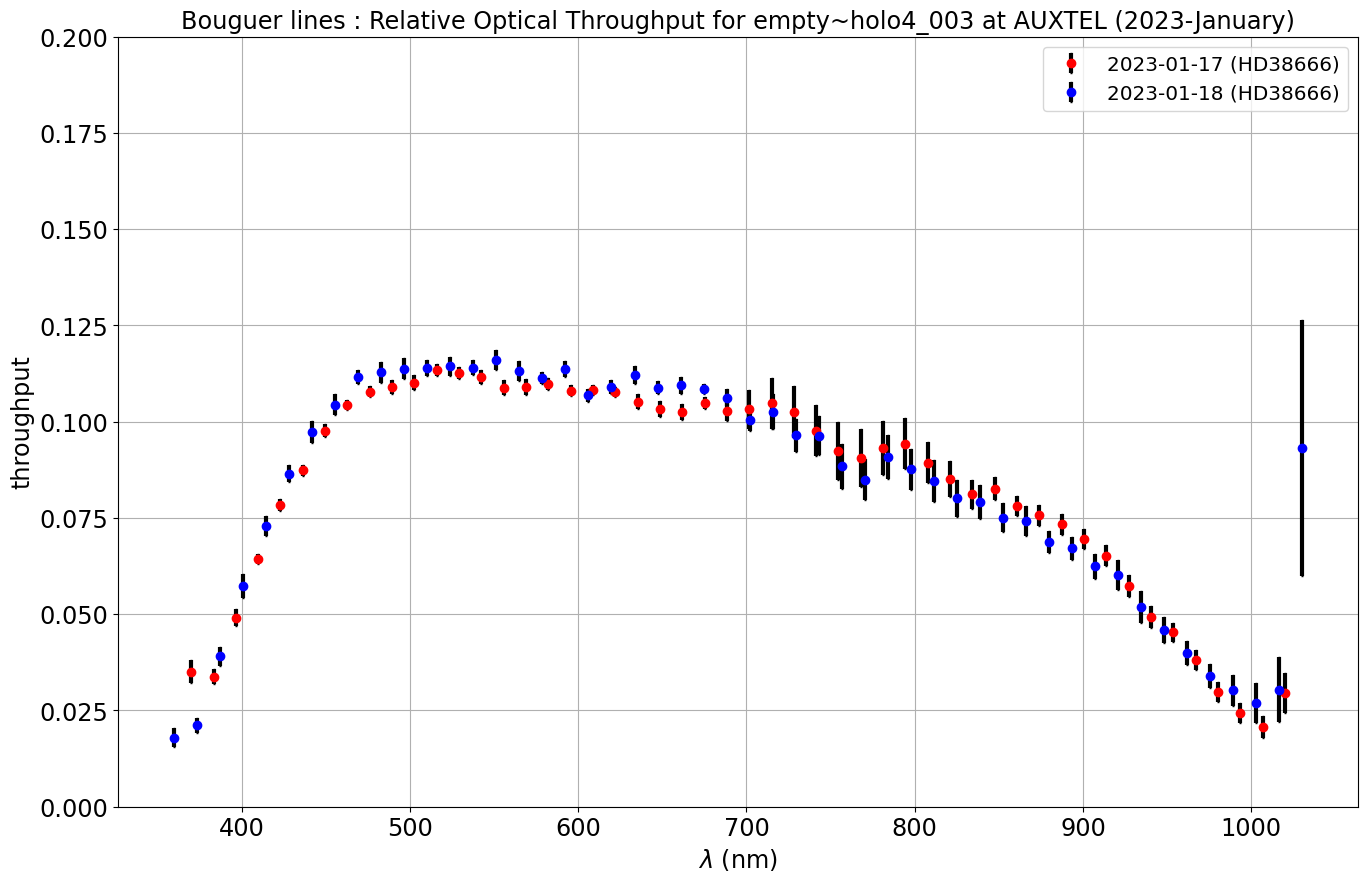

In [6]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

X1=df1["wavelength"].values
Y1=df1["throu"].values
EY1= df1["errthrou"].values

X2=df2["wavelength"].values
Y2=df2["throu"].values
EY2= df2["errthrou"].values


ax.errorbar(X1,Y1, yerr=EY1, xerr=None, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.errorbar(X2,Y2, yerr=EY2, xerr=None, fmt='o',color="b",ecolor="k", elinewidth=3, capsize=1,label="2023-01-18 (HD38666)")

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
        

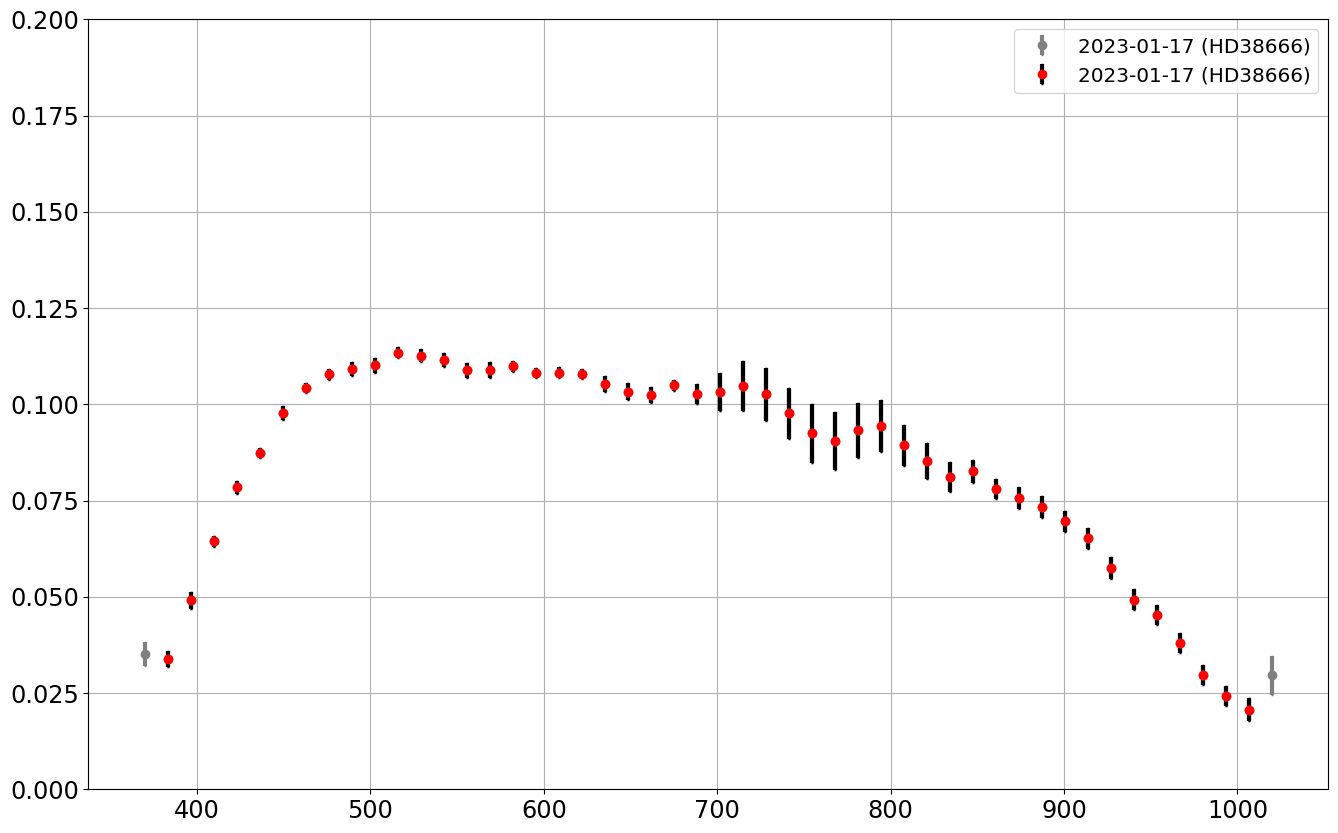

In [7]:
X1_clean = np.delete(X1, [0,-1])
Y1_clean = np.delete(Y1, [0,-1])
EY1_clean = np.delete(EY1, [0,-1])

fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X1,Y1, yerr=EY1, xerr=None, fmt='o',color="grey",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.errorbar(X1_clean,Y1_clean, yerr=EY1_clean, xerr=None, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()

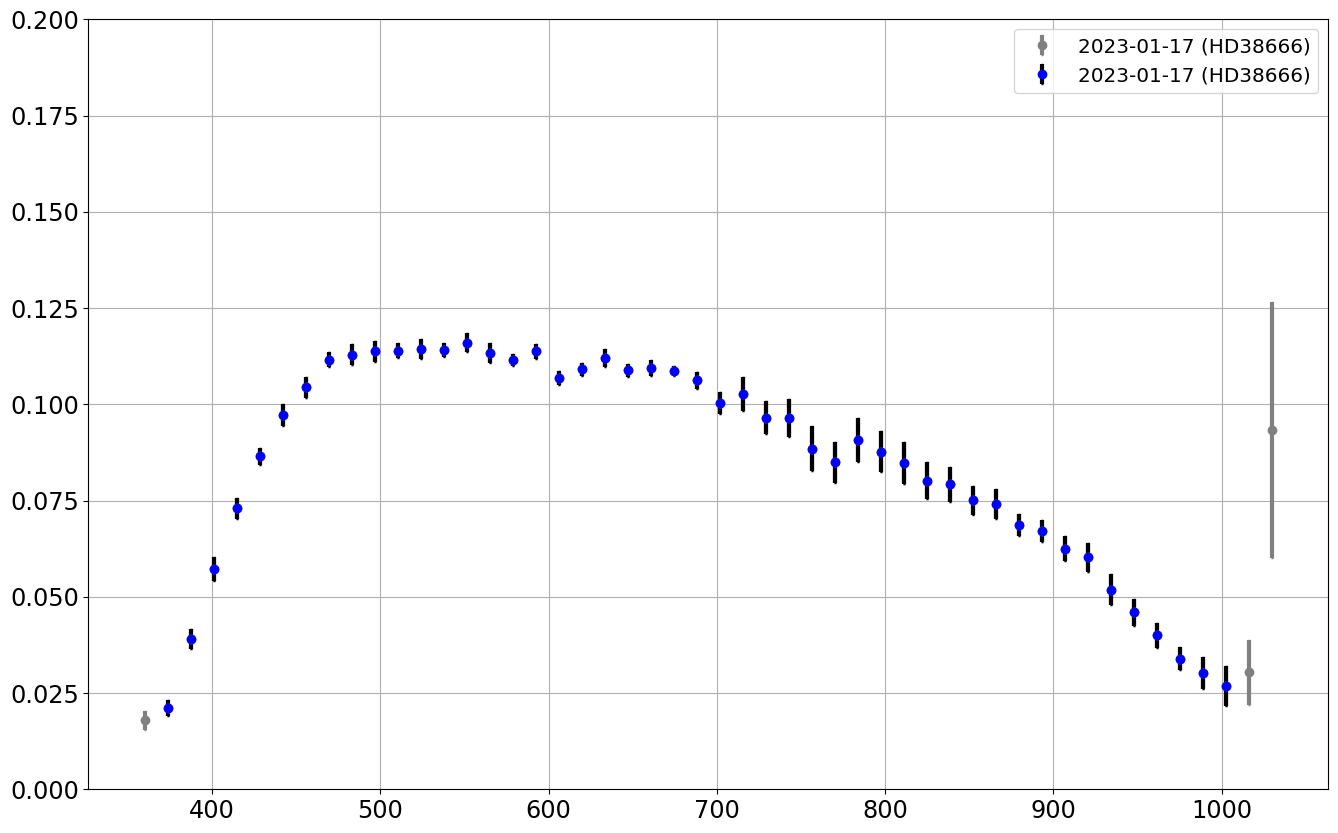

In [8]:
X2_clean = np.delete(X2, [0, -1,-2])
Y2_clean = np.delete(Y2, [0, -1,-2])
EY2_clean = np.delete(EY2, [0, -1,-2])

fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X2,Y2, yerr=EY2, xerr=None, fmt='o',color="grey",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.errorbar(X2_clean,Y2_clean, yerr=EY2_clean, xerr=None, fmt='o',color="b",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()

# Union of the cleaned

In [9]:
X = np.concatenate((X1_clean,X2_clean))
Y = np.concatenate((Y1_clean,Y2_clean))
EY = np.concatenate((EY1_clean,EY2_clean))

In [10]:
sorted_indexes = np.argsort(X)

In [11]:
X = X[sorted_indexes]
Y = Y[sorted_indexes]
EY = EY[sorted_indexes]

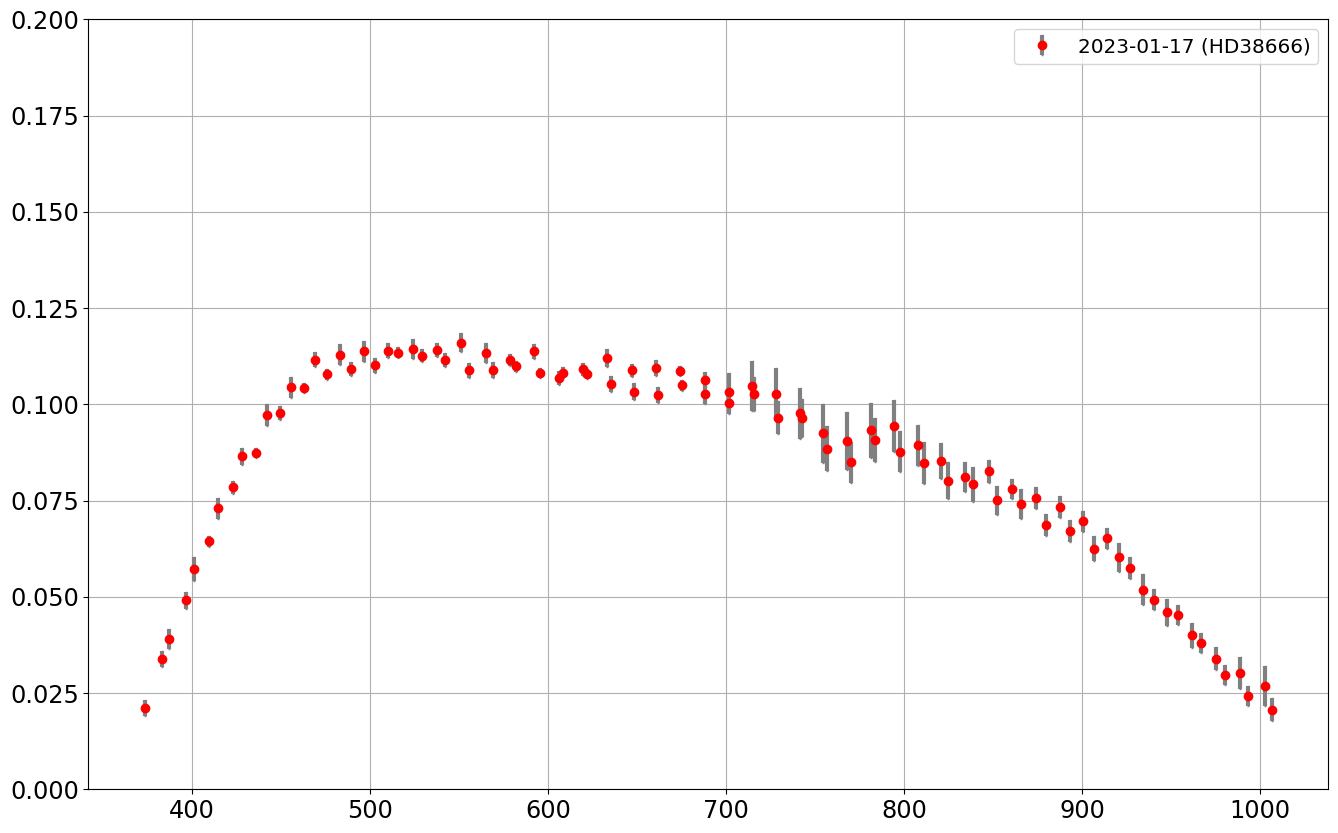

In [12]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()

# Insert First element

In [13]:
X = np.insert(X,0,360.)
Y = np.insert(Y,0,0.01)
EY = np.insert(EY,0,EY.max())

X = np.insert(X,0,350.)
Y = np.insert(Y,0,0.)
EY = np.insert(EY,0,EY.max())

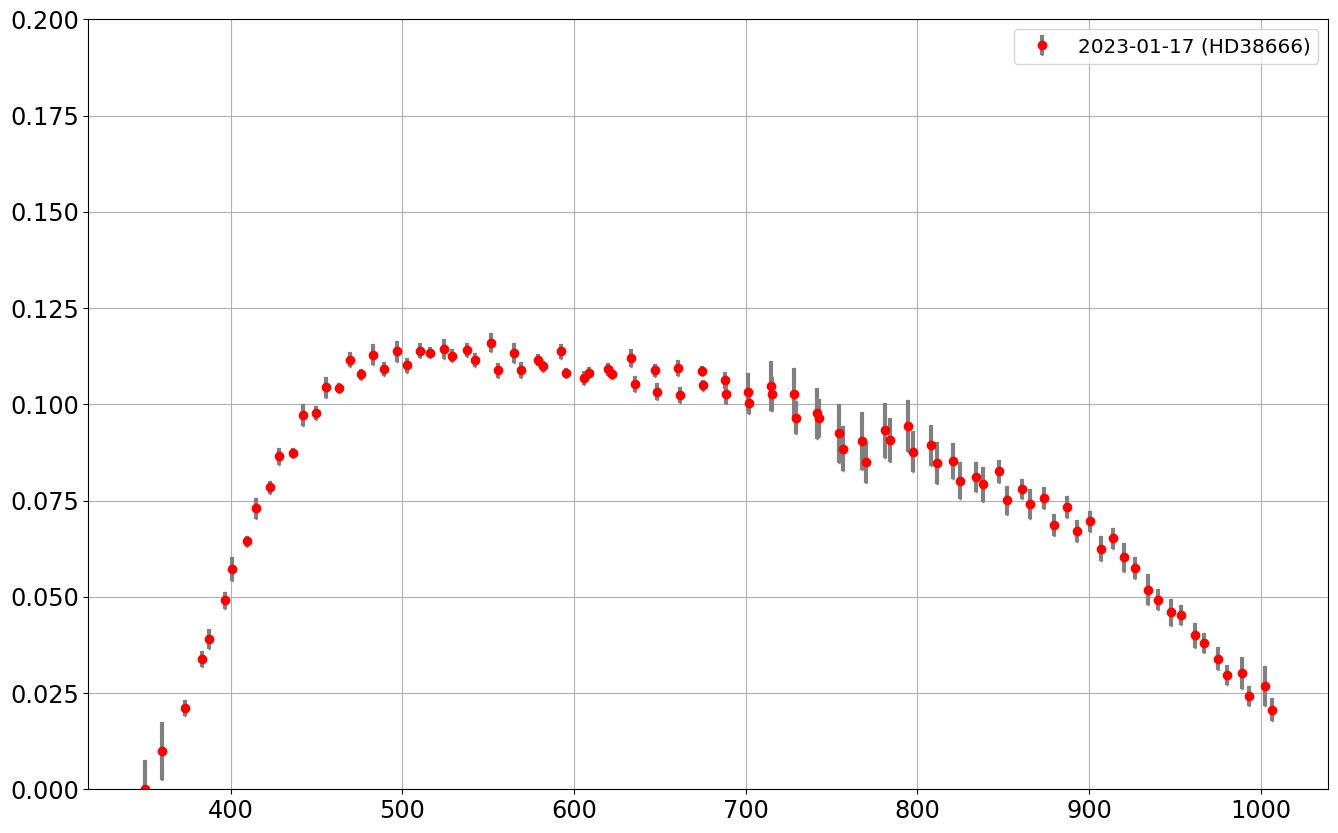

In [14]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()

# Insert Last Element

In [15]:
X = np.append(X,1025)
Y = np.append(Y,0.01)
EY = np.append(EY,EY.max())


X = np.append(X,1050)
Y = np.append(Y,0.)
EY = np.append(EY,EY.max())

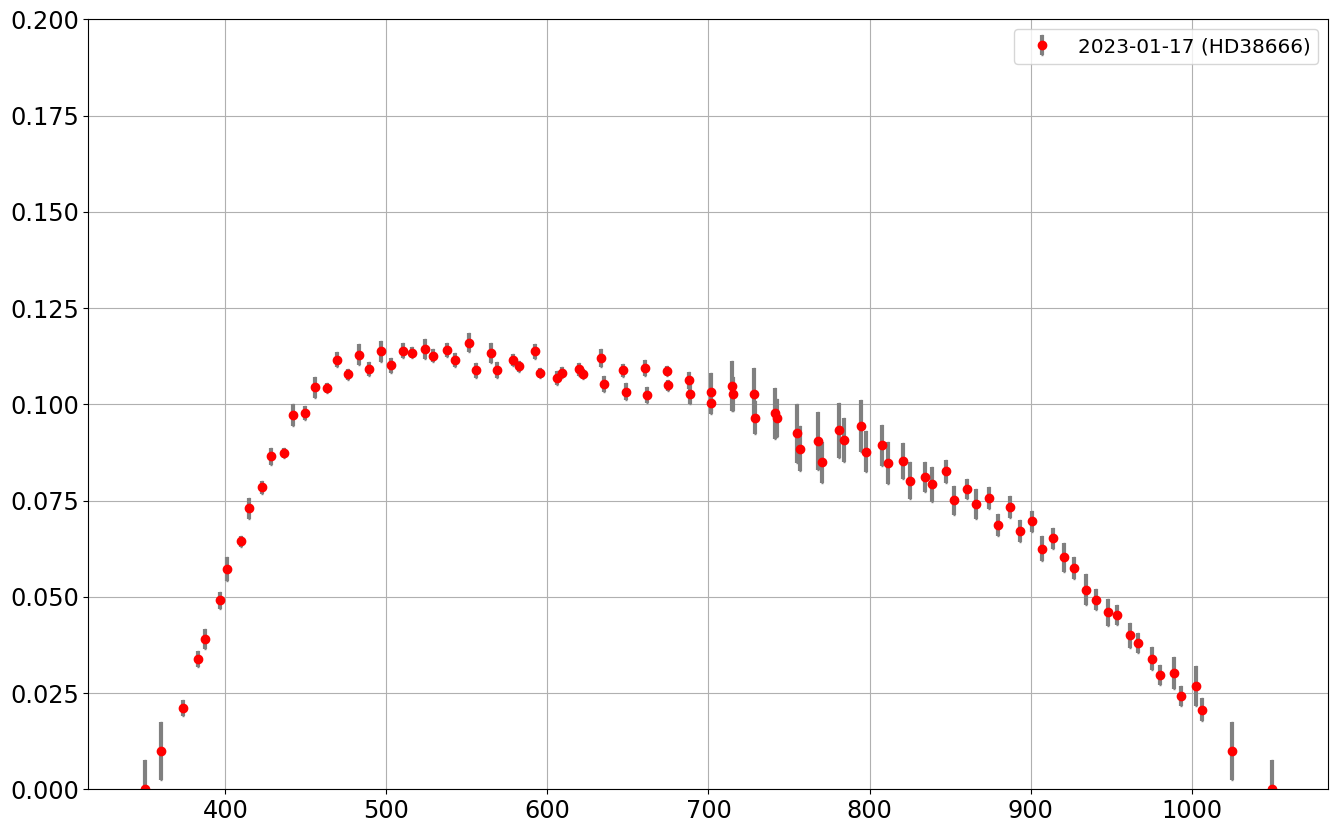

In [16]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()

# Fit a gaussian process

In [17]:
dfout = pd.DataFrame()
dfout["wavelength"]=X
dfout["throu"]=Y
dfout["errthrou"]=EY

In [18]:
!ls dataout/

MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-2023-01-17-HD38666.csv
MLfit_bouguer_linearfit-2023-01-18-HD38666.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_30nm_out.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230510-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230511-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv


In [19]:
outputroot = outputfile_linearfit.split('-')[0]
if FLAG_POLAR:
    outputfile_linearfit=outputroot+f"-{DATE}-polar.csv"
else:
    outputfile_linearfit=outputroot+f"-{DATE}-{target}.csv" 

In [20]:
# Save CSV file
dfout.to_csv(outputfile_linearfit) 